pip install tabulate

## Cálculo:
    
## print(f"El fondo tendrá suficiente capital para cancelar la hipoteca en el año {2025 + t_cancelacion}.")
## print(f"Será más rentable invertir en el fondo que seguir amortizando en el año {2025 + t_optimo}.")
## print(f"La desgravación total por amortizar anticipadamente será de {total_desgravacion:.2f} €.")

Capital inicial del préstamo (€):  100000
Tasa de interés anual de la hipoteca (%):  2
Plazo total en años:  30
Aportación anual al fondo (€):  1200
Rentabilidad anual del fondo (%):  5
Cantidad anual amortizada anticipadamente (€):  1200
Porcentaje de desgravación fiscal por amortización (%):  15


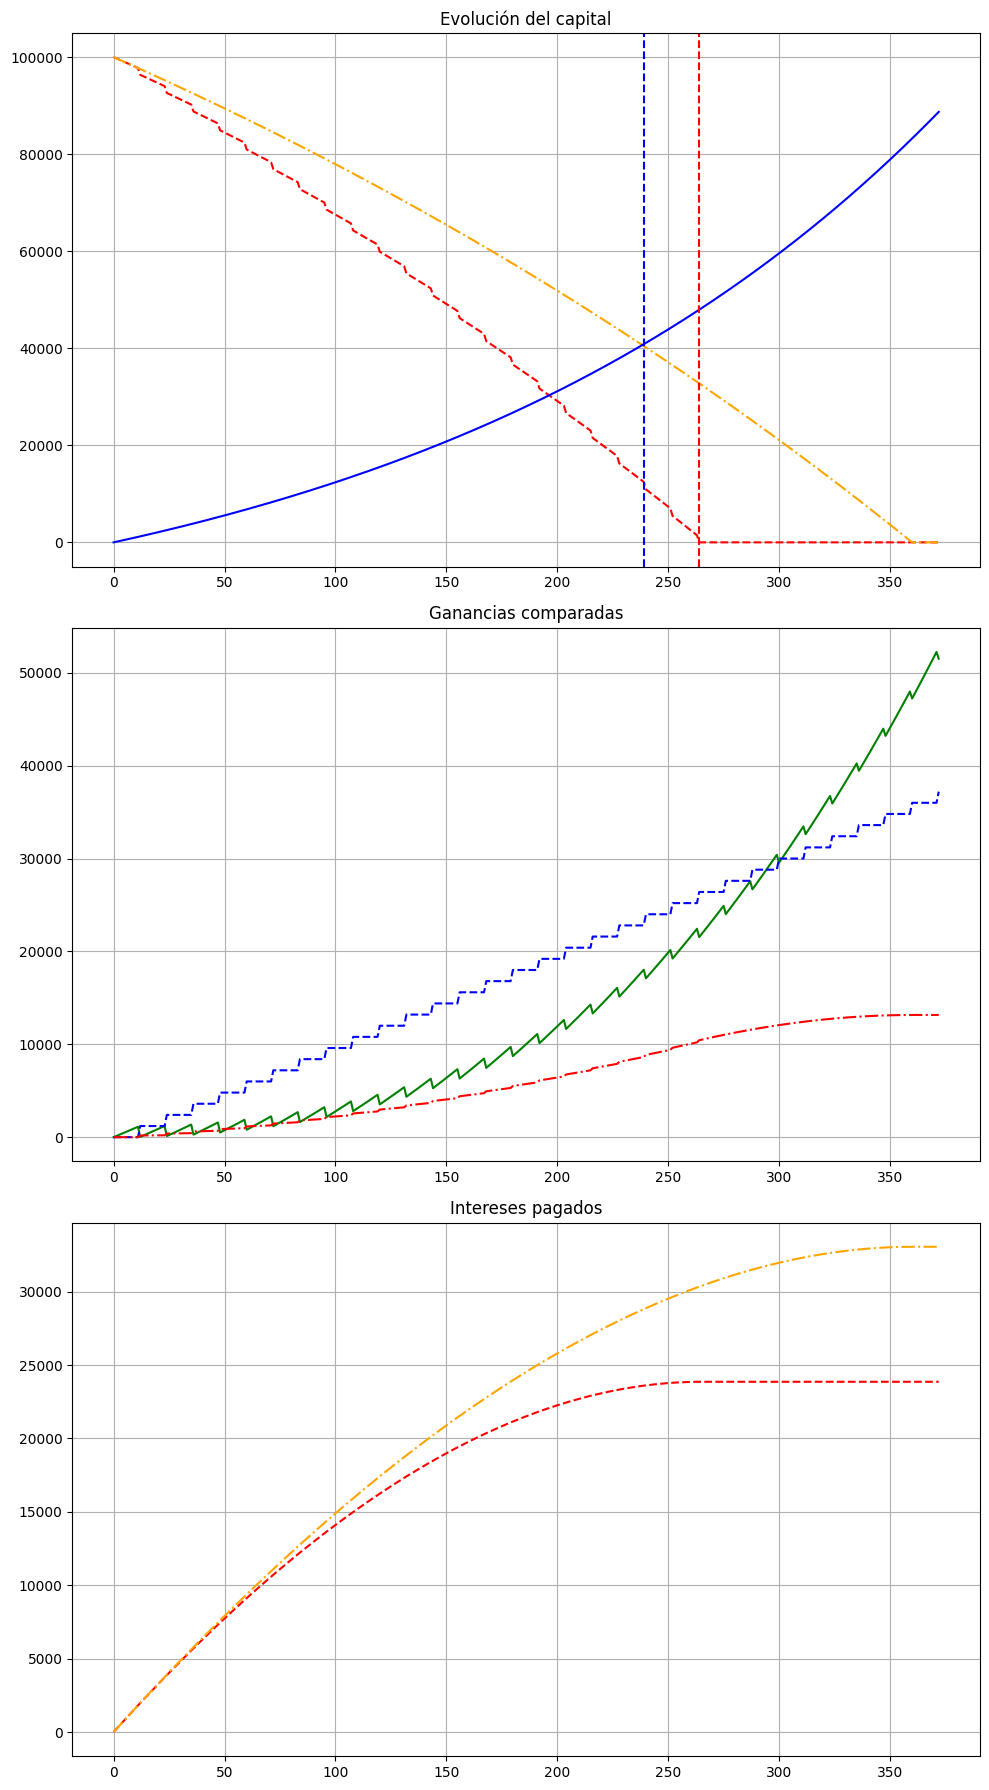


Resumen de resultados:
+----------------------------------------------------------------------+----------------------+
| Concepto                                                             | Valor                |
+======================================================================+======================+
| Cuota mensual/anual                                                  | 369.62 € / 4435.43 € |
+----------------------------------------------------------------------+----------------------+
| Mes de cancelación (amortizaciones)                                  | 264                  |
+----------------------------------------------------------------------+----------------------+
| Mes de cancelación (fondo)                                           | 239                  |
+----------------------------------------------------------------------+----------------------+
| Intereses pagados hasta cancelación (amortizaciones)                 | 23864.24 €           |
+---------------

In [19]:
import numpy as np
import matplotlib.pyplot as plt
from tabulate import tabulate

def solicitar_datos():
    P0 = float(input("Capital inicial del préstamo (€): "))
    i = float(input("Tasa de interés anual de la hipoteca (%): ")) / 100
    n = int(input("Plazo total en años: "))
    A = float(input("Aportación anual al fondo (€): "))
    r = float(input("Rentabilidad anual del fondo (%): ")) / 100
    C = float(input("Cantidad anual amortizada anticipadamente (€): "))
    desgravacion = float(input("Porcentaje de desgravación fiscal por amortización (%): ")) / 100
    return P0, i, n, A, r, C, desgravacion

def calcular_cuota_mensual(P0, i, n):
    i_mensual = i / 12
    n_meses = n * 12
    cuota_mensual = P0 * (i_mensual * (1 + i_mensual)**n_meses) / ((1 + i_mensual)**n_meses - 1)
    return cuota_mensual

def main():
    P0, i, n, A, r, C, desgravacion = solicitar_datos()
    cuota_mensual = calcular_cuota_mensual(P0, i, n)
    
    meses = np.arange(0, (n + 1) * 12 + 1)
    capital_hipoteca = [P0]
    capital_hipoteca_sin_amortizaciones = [P0]
    fondo = [0]
    
    capital_pendiente = P0
    capital_pendiente_sin_amortizaciones = P0
    fondo_acumulado = 0
    
    cancelacion_amortizaciones = None
    cancelacion_fondo = None
    
    # Variables para seguimiento de intereses
    intereses_pagados_amortizaciones = 0
    intereses_pagados_original = 0
    intereses_pagados_amortizaciones_grafica = [0]
    intereses_pagados_original_grafica = [0]
    
    # Variables para desgravación
    desgravacion_acumulada_amortizaciones = 0
    desgravacion_acumulada_fondo = 0
    
    # Variables para la última gráfica
    ganancia_fondo = [0]
    cantidad_invertida = [0]
    ganancia_amortizacion = [0]
    
    for mes in range(1, len(meses)):
        # Simulación sin amortizaciones (original)
        intereses_sin_amortizaciones = capital_pendiente_sin_amortizaciones * (i / 12)
        capital_pendiente_sin_amortizaciones -= cuota_mensual - intereses_sin_amortizaciones
        capital_pendiente_sin_amortizaciones = max(capital_pendiente_sin_amortizaciones, 0)
        intereses_pagados_original += intereses_sin_amortizaciones
        
        # Simulación con amortizaciones
        if mes % 12 == 0 and capital_pendiente > C:
            capital_pendiente -= C
            desgravacion_acumulada_amortizaciones += C * desgravacion
        
        intereses = capital_pendiente * (i / 12)
        capital_pendiente -= cuota_mensual - intereses
        capital_pendiente = max(capital_pendiente, 0)
        intereses_pagados_amortizaciones += intereses
        
        # Fondo acumulado
        fondo_acumulado = fondo_acumulado * (1 + r / 12) + (C / 12)
        desgravacion_acumulada_fondo += (C / 12) * desgravacion
        
        # Guardar valores
        capital_hipoteca.append(capital_pendiente)
        capital_hipoteca_sin_amortizaciones.append(capital_pendiente_sin_amortizaciones)
        fondo.append(fondo_acumulado)
        intereses_pagados_amortizaciones_grafica.append(intereses_pagados_amortizaciones)
        intereses_pagados_original_grafica.append(intereses_pagados_original)
        
        # Calcular ganancias para la última gráfica
        años_contribuidos = mes // 12
        ganancia_fondo_actual = fondo_acumulado - (años_contribuidos * C)
        ganancia_amortizacion_actual = (intereses_pagados_original - intereses_pagados_amortizaciones) + desgravacion_acumulada_amortizaciones
        
        ganancia_fondo.append(ganancia_fondo_actual)
        cantidad_invertida.append(años_contribuidos * C)
        ganancia_amortizacion.append(ganancia_amortizacion_actual)
        
        # Detectar cancelaciones
        if cancelacion_amortizaciones is None and capital_pendiente == 0:
            cancelacion_amortizaciones = mes
        if cancelacion_fondo is None and fondo_acumulado >= capital_pendiente_sin_amortizaciones:
            cancelacion_fondo = mes
    
    # Cálculo del crecimiento adicional del fondo
    if cancelacion_fondo and cancelacion_amortizaciones:
        fondo_al_cancelar_amortizaciones = fondo[cancelacion_amortizaciones]
        crecimiento_adicional_fondo = fondo_al_cancelar_amortizaciones - capital_pendiente_sin_amortizaciones
    else:
        crecimiento_adicional_fondo = 0
    
    # Gráficos
    fig, axs = plt.subplots(3, 1, figsize=(10, 18))
    
    # Gráfico 1: Capital pendiente
    axs[0].plot(meses, capital_hipoteca, label="Con amortizaciones", linestyle='--', color='red')
    axs[0].plot(meses, capital_hipoteca_sin_amortizaciones, label="Sin amortizaciones", linestyle='-.', color='orange')
    axs[0].plot(meses, fondo, label="Fondo", linestyle='-', color='blue')
    if cancelacion_amortizaciones:
        axs[0].axvline(cancelacion_amortizaciones, color='red', linestyle='--', label="Cancelación con amortizaciones")
    if cancelacion_fondo:
        axs[0].axvline(cancelacion_fondo, color='blue', linestyle='--', label="Cancelación con fondo")
    axs[0].set_title("Evolución del capital")
    axs[0].grid()
    
    # Gráfico 2: Ganancias del fondo vs. amortización
    axs[1].plot(meses, ganancia_fondo, label="Ganancia neta del fondo", color='green')
    axs[1].plot(meses, cantidad_invertida, label="Cantidad invertida", color='blue', linestyle='--')
    axs[1].plot(meses, ganancia_amortizacion, label="Ganancia por amortizar", color='red', linestyle='-.')
    axs[1].set_title("Ganancias comparadas")
    axs[1].grid()
    
    # Gráfico 3: Intereses pagados
    axs[2].plot(meses, intereses_pagados_amortizaciones_grafica, label="Intereses con amortizaciones", color='red', linestyle='--')
    axs[2].plot(meses, intereses_pagados_original_grafica, label="Intereses sin amortizaciones", color='orange', linestyle='-.')
    axs[2].set_title("Intereses pagados")
    axs[2].grid()
    
    plt.tight_layout()
    plt.show()
    
    # Cálculos para la tabla
    cuota_anual = cuota_mensual * 12
    
    # Intereses pagados hasta cancelación
    intereses_pagados_hasta_cancel_amort = intereses_pagados_amortizaciones_grafica[cancelacion_amortizaciones] if cancelacion_amortizaciones else intereses_pagados_amortizaciones
    intereses_pagados_hasta_cancel_fondo = intereses_pagados_original_grafica[cancelacion_fondo] if cancelacion_fondo else intereses_pagados_original
    
    # Desgravación total
    desgravacion_total_amort = (cancelacion_amortizaciones // 12) * C * desgravacion if cancelacion_amortizaciones else n * C * desgravacion
    desgravacion_total_fondo = (cancelacion_fondo // 12) * C * desgravacion if cancelacion_fondo else n * C * desgravacion
    
    tabla = [
        ["Cuota mensual/anual", f"{cuota_mensual:.2f} € / {cuota_anual:.2f} €"],
        ["Mes de cancelación (amortizaciones)", cancelacion_amortizaciones],
        ["Mes de cancelación (fondo)", cancelacion_fondo],
        ["Intereses pagados hasta cancelación (amortizaciones)", f"{intereses_pagados_hasta_cancel_amort:.2f} €"],
        ["Intereses pagados hasta cancelación (fondo)", f"{intereses_pagados_hasta_cancel_fondo:.2f} €"],
        ["Desgravación total (amortizaciones)", f"{desgravacion_total_amort:.2f} €"],
        ["Desgravación total (fondo)", f"{desgravacion_total_fondo:.2f} €"],
        ["Inversión total hasta cancelación (amortizaciones)", f"{(cancelacion_amortizaciones // 12) * C:.2f} €" if cancelacion_amortizaciones else f"{n * C:.2f} €"],
        ["Inversión total hasta cancelación (fondo)", f"{(cancelacion_fondo // 12) * C:.2f} €" if cancelacion_fondo else f"{n * C:.2f} €"],
        ["Crecimiento adicional del fondo hasta cancelación por amortizaciones", f"{crecimiento_adicional_fondo:.2f} €" if crecimiento_adicional_fondo else "No aplica"]
    ]
    
    print("\nResumen de resultados:")
    print(tabulate(tabla, headers=["Concepto", "Valor"], tablefmt="grid"))

if __name__ == "__main__":
    main()

Capital inicial del préstamo (€):  100000
Tasa de interés anual de la hipoteca (%):  2
Plazo total en años:  30
Aportación anual al fondo (€):  1200
Rentabilidad anual del fondo (%):  5
Cantidad anual amortizada anticipadamente (€):  1200
Porcentaje de desgravación fiscal por amortización (%):  15


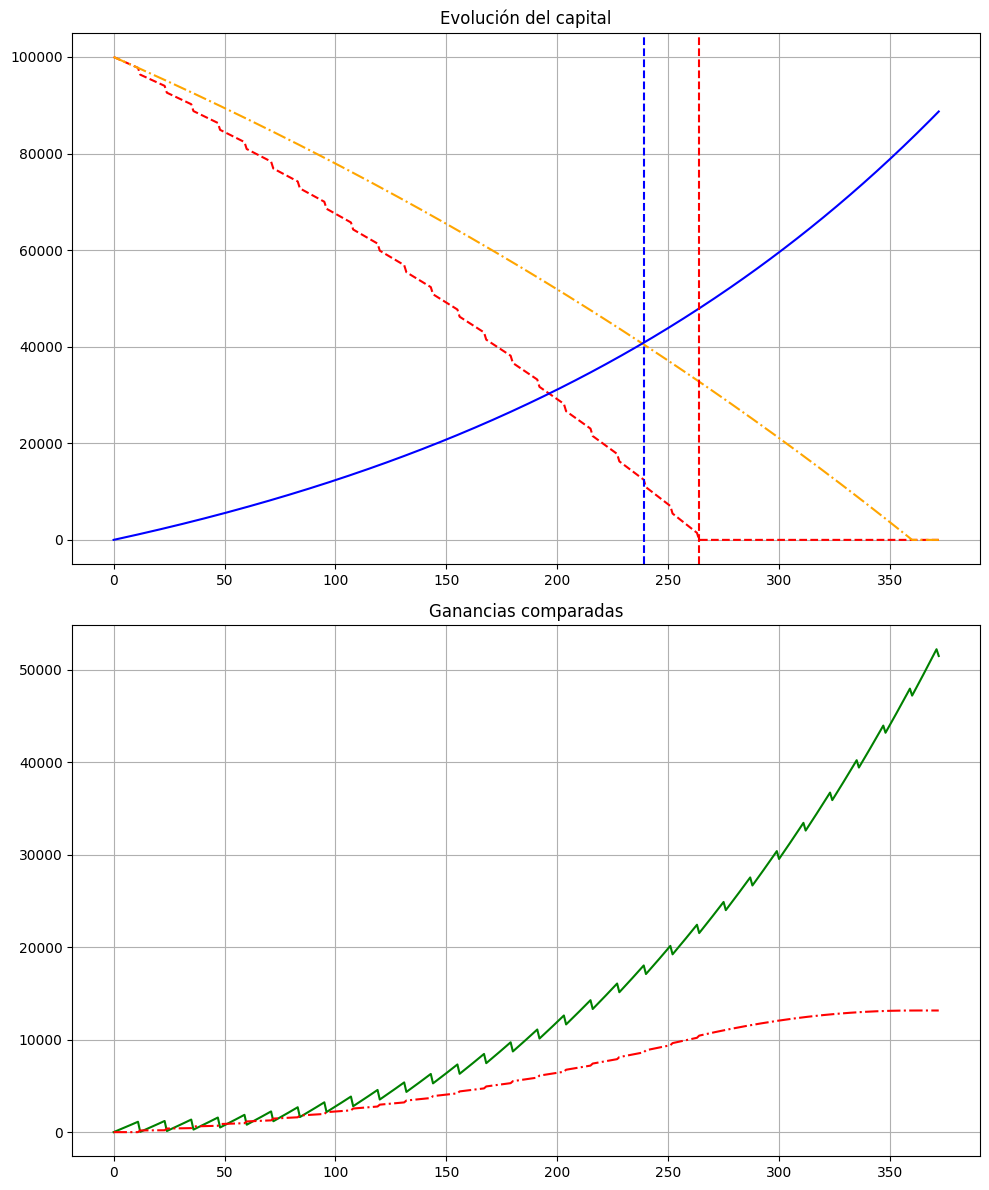


Resumen de resultados:
+----------------------------------------------------------------------+----------------------+
| Concepto                                                             | Valor                |
+======================================================================+======================+
| Cuota mensual/anual                                                  | 369.62 € / 4435.43 € |
+----------------------------------------------------------------------+----------------------+
| Mes de cancelación (amortizaciones)                                  | 264                  |
+----------------------------------------------------------------------+----------------------+
| Mes de cancelación (fondo)                                           | 239                  |
+----------------------------------------------------------------------+----------------------+
| Intereses pagados hasta cancelación (amortizaciones)                 | 23864.24 €           |
+---------------

In [20]:
import numpy as np
import matplotlib.pyplot as plt
from tabulate import tabulate

def solicitar_datos():
    P0 = float(input("Capital inicial del préstamo (€): "))
    i = float(input("Tasa de interés anual de la hipoteca (%): ")) / 100
    n = int(input("Plazo total en años: "))
    A = float(input("Aportación anual al fondo (€): "))
    r = float(input("Rentabilidad anual del fondo (%): ")) / 100
    C = float(input("Cantidad anual amortizada anticipadamente (€): "))
    desgravacion = float(input("Porcentaje de desgravación fiscal por amortización (%): ")) / 100
    return P0, i, n, A, r, C, desgravacion

def calcular_cuota_mensual(P0, i, n):
    i_mensual = i / 12
    n_meses = n * 12
    cuota_mensual = P0 * (i_mensual * (1 + i_mensual)**n_meses) / ((1 + i_mensual)**n_meses - 1)
    return cuota_mensual

def main():
    P0, i, n, A, r, C, desgravacion = solicitar_datos()
    cuota_mensual = calcular_cuota_mensual(P0, i, n)
    
    meses = np.arange(0, (n + 1) * 12 + 1)
    capital_hipoteca = [P0]
    capital_hipoteca_sin_amortizaciones = [P0]
    fondo = [0]
    
    capital_pendiente = P0
    capital_pendiente_sin_amortizaciones = P0
    fondo_acumulado = 0
    
    cancelacion_amortizaciones = None
    cancelacion_fondo = None
    
    # Variables para seguimiento de intereses
    intereses_pagados_amortizaciones = 0
    intereses_pagados_original = 0
    intereses_pagados_amort_grafica = [0]
    intereses_pagados_original_grafica = [0]
    
    # Variables para desgravación
    desgravacion_acum_amort = 0
    desgravacion_acum_fondo = 0
    
    # Variables para ganancias
    ganancia_fondo = [0]
    ganancia_amortizacion = [0]
    
    for mes in range(1, len(meses)):
        # Simulación sin amortizaciones
        intereses_original = capital_pendiente_sin_amortizaciones * (i / 12)
        capital_pendiente_sin_amortizaciones -= cuota_mensual - intereses_original
        capital_pendiente_sin_amortizaciones = max(capital_pendiente_sin_amortizaciones, 0)
        intereses_pagados_original += intereses_original
        
        # Simulación con amortizaciones
        if mes % 12 == 0 and capital_pendiente > C:
            capital_pendiente -= C
            desgravacion_acum_amort += C * desgravacion
        
        intereses_amort = capital_pendiente * (i / 12)
        capital_pendiente -= cuota_mensual - intereses_amort
        capital_pendiente = max(capital_pendiente, 0)
        intereses_pagados_amortizaciones += intereses_amort
        
        # Fondo acumulado
        fondo_acumulado = fondo_acumulado * (1 + r / 12) + (C / 12)
        desgravacion_acum_fondo += (C / 12) * desgravacion
        
        # Guardar valores
        capital_hipoteca.append(capital_pendiente)
        capital_hipoteca_sin_amortizaciones.append(capital_pendiente_sin_amortizaciones)
        fondo.append(fondo_acumulado)
        intereses_pagados_amort_grafica.append(intereses_pagados_amortizaciones)
        intereses_pagados_original_grafica.append(intereses_pagados_original)
        
        # Ganancias
        ganancia_fondo_actual = fondo_acumulado - (mes // 12) * C  # Rendimiento neto del fondo
        ganancia_amort_actual = (intereses_pagados_original - intereses_pagados_amortizaciones) + desgravacion_acum_amort
        
        ganancia_fondo.append(ganancia_fondo_actual)
        ganancia_amortizacion.append(ganancia_amort_actual)
        
        # Detectar cancelaciones
        if cancelacion_amortizaciones is None and capital_pendiente == 0:
            cancelacion_amortizaciones = mes
        if cancelacion_fondo is None and fondo_acumulado >= capital_pendiente_sin_amortizaciones:
            cancelacion_fondo = mes
    
    # Cálculo del crecimiento adicional del fondo
    if cancelacion_fondo and cancelacion_amortizaciones:
        fondo_al_cancel_fondo = fondo[cancelacion_fondo]
        meses_adicionales = cancelacion_amortizaciones - cancelacion_fondo
        for mes in range(cancelacion_fondo + 1, cancelacion_amortizaciones + 1):
            fondo_al_cancel_fondo = fondo_al_cancel_fondo * (1 + r / 12)
        crecimiento_adicional = fondo_al_cancel_fondo - capital_pendiente_sin_amortizaciones
    else:
        crecimiento_adicional = 0
    
    # Gráficos
    fig, axs = plt.subplots(2, 1, figsize=(10, 12))
    
    # Gráfico 1: Capital pendiente
    axs[0].plot(meses, capital_hipoteca, label="Con amortizaciones", linestyle='--', color='red')
    axs[0].plot(meses, capital_hipoteca_sin_amortizaciones, label="Sin amortizaciones", linestyle='-.', color='orange')
    axs[0].plot(meses, fondo, label="Fondo", linestyle='-', color='blue')
    if cancelacion_amortizaciones:
        axs[0].axvline(cancelacion_amortizaciones, color='red', linestyle='--', label="Cancelación con amortizaciones")
    if cancelacion_fondo:
        axs[0].axvline(cancelacion_fondo, color='blue', linestyle='--', label="Cancelación con fondo")
    axs[0].set_title("Evolución del capital")
    axs[0].grid()
    
    # Gráfico 2: Ganancias comparadas
    axs[1].plot(meses, ganancia_fondo, label="Ganancia neta del fondo", color='green')
    axs[1].plot(meses, ganancia_amortizacion, label="Ganancia por amortizar", color='red', linestyle='-.')
    axs[1].set_title("Ganancias comparadas")
    axs[1].grid()
    
    plt.tight_layout()
    plt.show()
    
    # Cálculos para la tabla
    cuota_anual = cuota_mensual * 12
    
    # Intereses pagados hasta cancelación
    intereses_pagados_hasta_cancel_amort = intereses_pagados_amortizaciones if cancelacion_amortizaciones else intereses_pagados_original
    intereses_pagados_hasta_cancel_fondo = intereses_pagados_original_grafica[cancelacion_fondo] if cancelacion_fondo else intereses_pagados_original
    
    # Desgravación total
    desgravacion_total_amort = (cancelacion_amortizaciones // 12) * C * desgravacion if cancelacion_amortizaciones else n * C * desgravacion
    desgravacion_total_fondo = (cancelacion_fondo // 12) * C * desgravacion if cancelacion_fondo else n * C * desgravacion
    
    tabla = [
        ["Cuota mensual/anual", f"{cuota_mensual:.2f} € / {cuota_anual:.2f} €"],
        ["Mes de cancelación (amortizaciones)", cancelacion_amortizaciones],
        ["Mes de cancelación (fondo)", cancelacion_fondo],
        ["Intereses pagados hasta cancelación (amortizaciones)", f"{intereses_pagados_hasta_cancel_amort:.2f} €"],
        ["Intereses pagados hasta cancelación (fondo)", f"{intereses_pagados_hasta_cancel_fondo:.2f} €"],
        ["Desgravación total (amortizaciones)", f"{desgravacion_total_amort:.2f} €"],
        ["Desgravación total (fondo)", f"{desgravacion_total_fondo:.2f} €"],
        ["Inversión total hasta cancelación (amortizaciones)", f"{(cancelacion_amortizaciones // 12) * C:.2f} €" if cancelacion_amortizaciones else f"{n * C:.2f} €"],
        ["Inversión total hasta cancelación (fondo)", f"{(cancelacion_fondo // 12) * C:.2f} €" if cancelacion_fondo else f"{n * C:.2f} €"],
        ["Crecimiento adicional del fondo hasta cancelación por amortizaciones", f"{crecimiento_adicional:.2f} €" if crecimiento_adicional else "No aplica"]
    ]
    
    print("\nResumen de resultados:")
    print(tabulate(tabla, headers=["Concepto", "Valor"], tablefmt="grid"))

if __name__ == "__main__":
    main()